# MNIST Digit Classifier using Neural Networks

In [164]:
__author__ = 'rsh'

In [165]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
from torch import nn, optim

In [167]:
from torchvision import datasets, transforms

In [168]:
print (torch.__version__)

1.4.0


In [169]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,),)])

In [170]:
traindata = datasets.MNIST('./MNIST', train=True, download=True, transform=transform)

In [171]:
testdata = datasets.MNIST('./MNIST', train=False, download=True, transform=transform)

In [172]:
len(traindata), len(testdata)

(60000, 10000)

In [173]:
trainloader = torch.utils.data.DataLoader(traindata, shuffle=True, batch_size=64)
testloader = torch.utils.data.DataLoader(testdata, shuffle=True, batch_size=64)

In [174]:
images, labels = next(iter(trainloader))

In [175]:
images.shape

torch.Size([64, 1, 28, 28])

The label is 3


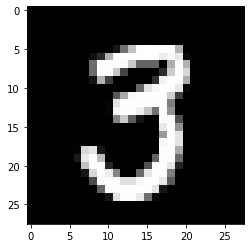

In [176]:
plt.imshow(images[0].squeeze(), cmap='Greys_r')

print ('The label is {}'.format(labels[0].item()))

In [182]:
class DigitClassifier(nn.Module):
    def __init__(self,):
        super(DigitClassifier, self).__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, 64)
        self.linear3 = nn.Linear(64, 10)
        
        self.relu = nn.ReLU()
        
        self.dropout = nn.Dropout(p=0.20)
        self.logsoftmax = nn.LogSoftmax(dim=1)
    
    def forward(self, input):
        out = self.relu(self.linear1(input))
        out = self.relu(self.linear2(self.dropout(out)))
        out = self.logsoftmax(self.linear3(self.dropout(out)))
        
        return out

In [183]:
model = DigitClassifier()

In [184]:
criterion = nn.NLLLoss()

In [185]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [186]:
def test_validation(model, test_data):
    total = 0.
    correct = 0.
    test_loss = 0.
    with torch.no_grad():
        model.eval()
        for images, labels in test_data:
            images_size = images.shape[0]
            images = images.view(images_size, -1)
            pred = model(images)
            test_loss += criterion(pred, labels).item()
            value, pred_class = torch.max(pred, dim=1)
            total += images_size
            correct += torch.sum(pred_class == labels)
    return float(correct * 100./total), test_loss/len(test_data)

In [187]:
loss_array = []
test_loss_array = []
accuracy_array = []
loss_val = 0
epochs = 15

# Training 

for i in range(epochs):
    loss_val = 0
    model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        loss_val += loss.item()
        
        optimizer.step()
    else:
        accuracy, t_loss = test_validation(model, testloader)
        accuracy_array.append(accuracy)
        test_loss_array.append(t_loss)
        print ('Loss at epoch {} is {}, accuracy: {}'.format(i+1, loss_val/len(trainloader), accuracy))
        print ('Test Loss {}'.format(t_loss))
        loss_array.append(loss_val/len(trainloader))

Loss at epoch 1 is 2.2342412771700797, accuracy: 44.810001373291016
Test Loss 2.1300983899717876
Loss at epoch 2 is 2.0119378095242513, accuracy: 61.2599983215332
Test Loss 1.7988527436165294
Loss at epoch 3 is 1.6404122834774986, accuracy: 71.29000091552734
Test Loss 1.344251855923112
Loss at epoch 4 is 1.2734376741751934, accuracy: 76.9000015258789
Test Loss 0.9965301717922186
Loss at epoch 5 is 1.022505689340868, accuracy: 80.47000122070312
Test Loss 0.7910712103175509
Loss at epoch 6 is 0.8678638159847463, accuracy: 82.69000244140625
Test Loss 0.6693577151389638
Loss at epoch 7 is 0.7745124799038555, accuracy: 84.1500015258789
Test Loss 0.5943902582879279
Loss at epoch 8 is 0.7083387647165673, accuracy: 85.33999633789062
Test Loss 0.542528697639514
Loss at epoch 9 is 0.6566814463784192, accuracy: 86.4000015258789
Test Loss 0.5057600277244665
Loss at epoch 10 is 0.6186877207588285, accuracy: 87.08000183105469
Test Loss 0.47440422834104795
Loss at epoch 11 is 0.5870248559060127, accu

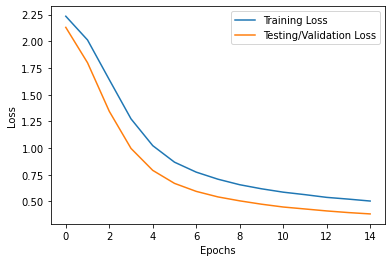

In [188]:
x_epochs = [i for i in range(epochs)]
plt.plot(x_epochs, loss_array, label='Training Loss')
plt.plot(x_epochs, test_loss_array, label='Testing/Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

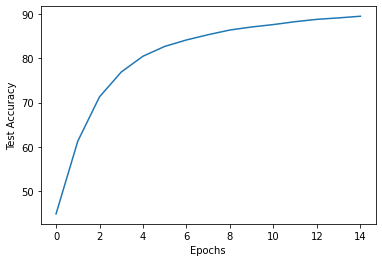

In [189]:
plt.plot([i for i in range(epochs)], accuracy_array)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()

Predicted: 6
Actual: 6


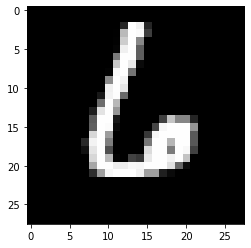

In [190]:
# Testing on an image (index = 5; you can vary the index)
test_images, test_label = next(iter(testloader))

test_image = test_images.view(test_images.shape[0], -1)[5]

# print (test_image.shape)

# print (test_image.view(1, -1).shape)

pred = model(test_image.view(1, -1))

_, pred_class = torch.max(pred, dim=1)

plt.imshow(test_images[5].squeeze(), cmap='Greys_r')

print ('Predicted: {}'.format(pred_class.item()))

print ('Actual: {}'.format(test_label[5]))


In [191]:
# weights and biases
for param in model.parameters():
    print (param.data)

tensor([[-0.0019, -0.0048, -0.0200,  ...,  0.0054, -0.0365, -0.0041],
        [-0.0225, -0.0056, -0.0150,  ..., -0.0232,  0.0123,  0.0215],
        [ 0.0169,  0.0312,  0.0036,  ..., -0.0369, -0.0118, -0.0218],
        ...,
        [-0.0289,  0.0152,  0.0316,  ..., -0.0025, -0.0054,  0.0261],
        [-0.0193,  0.0013,  0.0123,  ..., -0.0123,  0.0292,  0.0317],
        [ 0.0355,  0.0280,  0.0130,  ...,  0.0309,  0.0246, -0.0139]])
tensor([ 3.2550e-02,  2.7406e-02, -9.5288e-03, -2.5414e-02, -2.9443e-02,
         6.2944e-03,  5.7476e-03, -1.1755e-02, -4.8443e-04,  1.6004e-02,
        -6.3059e-03,  3.5220e-02, -6.5203e-03, -7.8096e-03, -1.6373e-02,
         1.6292e-02,  3.3308e-02,  1.8964e-02, -8.8603e-03,  6.2279e-03,
        -2.5987e-02,  2.3914e-02,  1.3146e-02,  1.8537e-02,  2.2966e-02,
        -2.0079e-02,  1.7729e-02, -1.3092e-02, -2.8327e-02,  6.3445e-03,
         2.1601e-02,  8.3335e-03, -1.9455e-02,  1.4195e-03,  9.3175e-03,
         2.4311e-02, -3.5179e-02, -2.1400e-02,  1.5771e